# **Import Libraries**

In [1]:
# Import necessary libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

# **Load the dataset**

In [2]:
# Load the dataset

df = pd.read_csv('/kaggle/input/imdb-movie-dataset/imdb_movie_dataset.csv')

print("First five rows of the dataset:")

display(df.head())

First five rows of the dataset:


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
# ### Dataset Description

description = """

The dataset comprises anonymized data on movies available on IMDb, capturing various aspects such as genre, rating, and revenue.

This dataset can be utilized for analyzing movie trends, audience preferences, and the impact of different attributes like genre and director on movie success.

It can aid in understanding the factors contributing to high ratings and box office revenue, as well as providing insights into the popularity of genres over time.

"""

print(description)



The dataset comprises anonymized data on movies available on IMDb, capturing various aspects such as genre, rating, and revenue.

This dataset can be utilized for analyzing movie trends, audience preferences, and the impact of different attributes like genre and director on movie success.

It can aid in understanding the factors contributing to high ratings and box office revenue, as well as providing insights into the popularity of genres over time.




In [4]:
# ### Basic Information about the dataset

print("Dataset Information:")

df.info()



# ### Check for Missing Values

print("Missing values in each column:")

print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB
Missing values in each column:
Rank                    0
Title                   0
Genre                   0
Description    

# **Data Cleaning**

In [5]:
# Data Cleaning: Convert 'Revenue' to numeric and handle errors

df['Revenue (Millions)'] = pd.to_numeric(df['Revenue (Millions)'], errors='coerce')



# Drop rows with missing values

df.dropna(inplace=True)

# **Exploratory Data Analysis (EDA)**

## **Distribution of Ratings**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


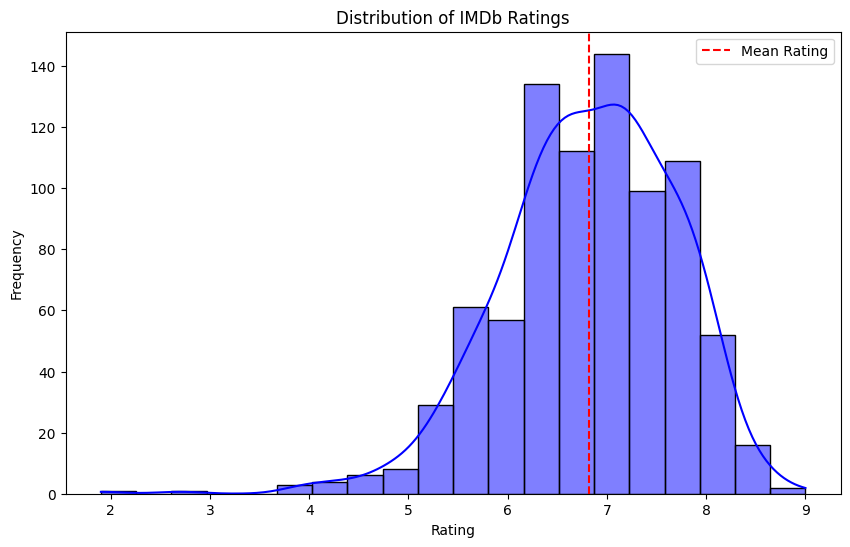

In [6]:
plt.figure(figsize=(10, 6))

sns.histplot(df['Rating'], bins=20, kde=True, color='blue')

plt.title('Distribution of IMDb Ratings')

plt.xlabel('Rating')

plt.ylabel('Frequency')

plt.axvline(df['Rating'].mean(), color='red', linestyle='--', label='Mean Rating')

plt.legend()

plt.show()

## **Top 10 Movies by Rating**

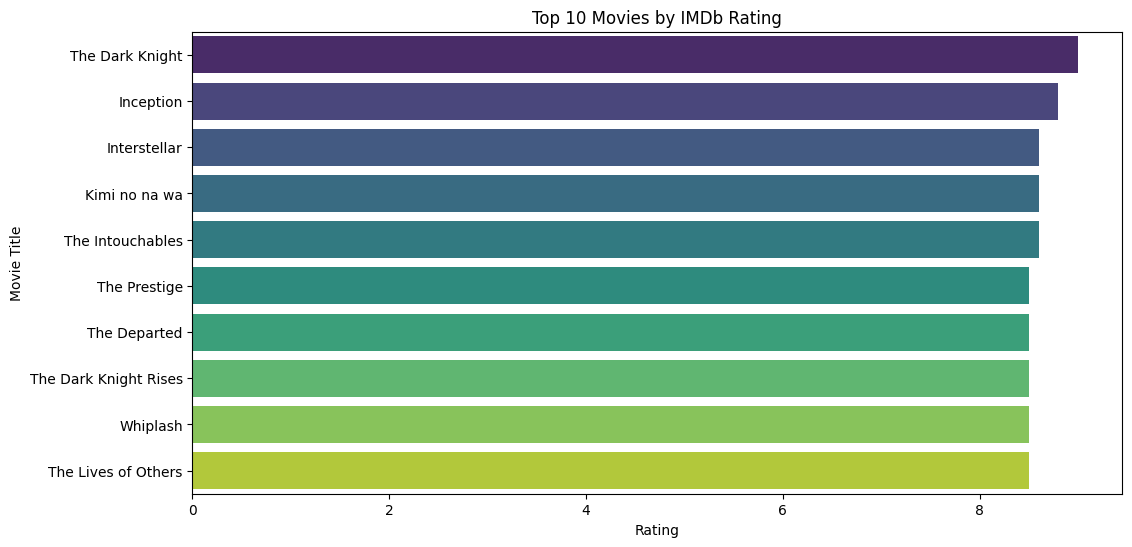

In [7]:
top_rated = df.nlargest(10, 'Rating')

plt.figure(figsize=(12, 6))

sns.barplot(x='Rating', y='Title', data=top_rated, palette='viridis')

plt.title('Top 10 Movies by IMDb Rating')

plt.xlabel('Rating')

plt.ylabel('Movie Title')

plt.show()

## **Revenue vs Rating**

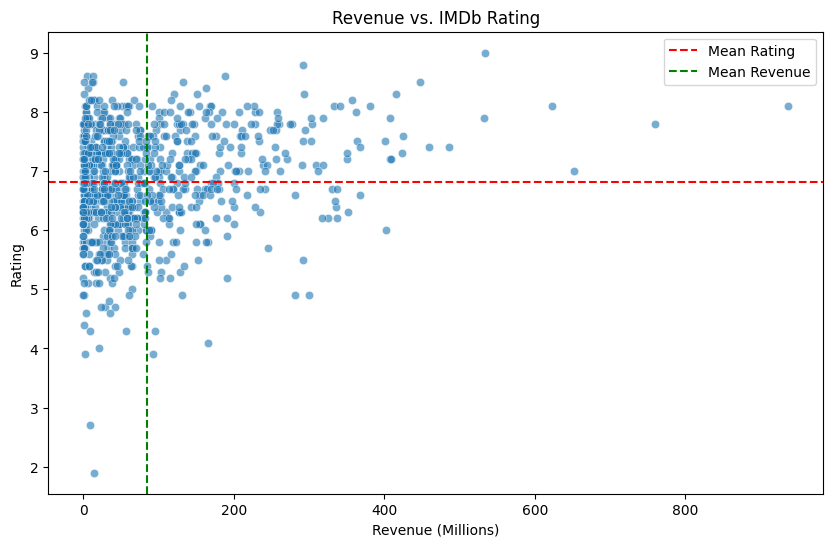

In [8]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='Revenue (Millions)', y='Rating', alpha=0.6)

plt.title('Revenue vs. IMDb Rating')

plt.xlabel('Revenue (Millions)')

plt.ylabel('Rating')

plt.axhline(df['Rating'].mean(), color='red', linestyle='--', label='Mean Rating')

plt.axvline(df['Revenue (Millions)'].mean(), color='green', linestyle='--', label='Mean Revenue')

plt.legend()

plt.show()

## **Ratings by Genre**

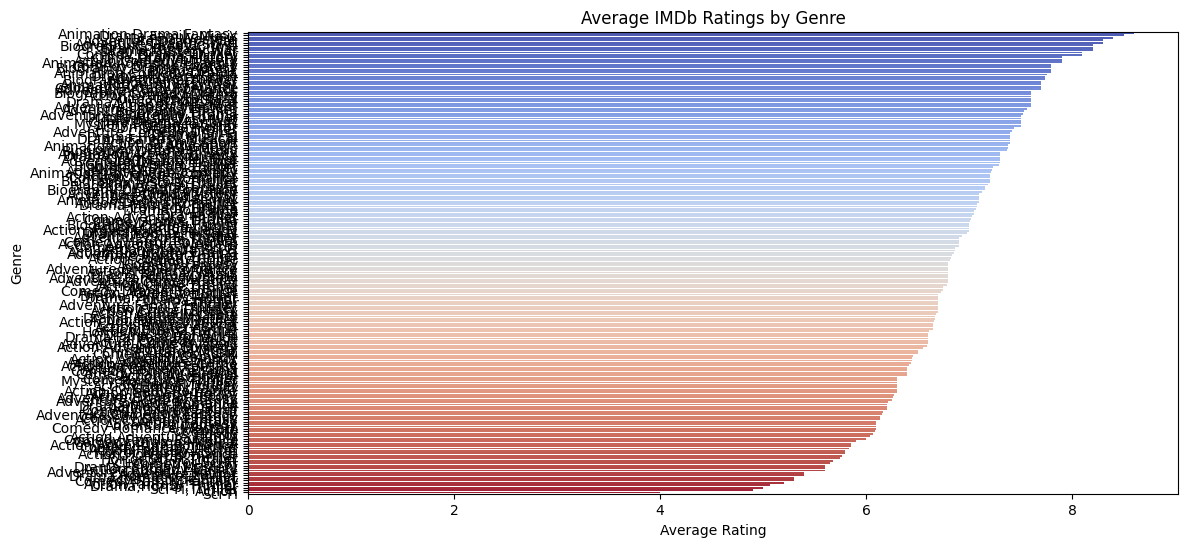

In [9]:
genre_ratings = df.explode('Genre')

genre_avg_rating = genre_ratings.groupby('Genre')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

sns.barplot(x=genre_avg_rating.values, y=genre_avg_rating.index, palette='coolwarm')

plt.title('Average IMDb Ratings by Genre')

plt.xlabel('Average Rating')

plt.ylabel('Genre')

plt.show()

# **Model Application**

## **Preparing Data for Modeling**

In [10]:
# Select features and target variable

X = df[['Revenue (Millions)', 'Runtime (Minutes)', 'Votes']]

y = df['Rating']



# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Linear Regression Model**

In [11]:
model = LinearRegression()

model.fit(X_train, y_train)



# Predict on the test set

y_pred = model.predict(X_test)



# ### 4.3: Model Evaluation

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)



print(f'Mean Squared Error: {mse:.2f}')

print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.50
R^2 Score: 0.37


# **Conclusion and Insights**

In [12]:
conclusions = """

1. The distribution of IMDb ratings shows a tendency towards higher ratings, with the mean rating being above average.

2. There is a positive correlation between revenue and IMDb ratings, indicating that higher-grossing films tend to receive better ratings.

3. The linear regression model indicates that revenue, runtime, and number of votes can help predict IMDb ratings with reasonable accuracy.

4. Action and Drama genres have the highest average ratings, while the scatter plot highlights the diversity in revenue across different rated movies.

"""

print(conclusions)



1. The distribution of IMDb ratings shows a tendency towards higher ratings, with the mean rating being above average.

2. There is a positive correlation between revenue and IMDb ratings, indicating that higher-grossing films tend to receive better ratings.

3. The linear regression model indicates that revenue, runtime, and number of votes can help predict IMDb ratings with reasonable accuracy.

4. Action and Drama genres have the highest average ratings, while the scatter plot highlights the diversity in revenue across different rated movies.


